In [214]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import grid_search 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Least squares and linear basis functions models
## Least squares

In [215]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    e=y-np.dot(tx,w);
    loss = 1/(2*len(tx))*np.dot(e.T,e)
    # ***************************************************
    return loss

In [216]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    XtX = np.dot(tx.T, tx)
    Xty = np.dot(tx.T,y)
    
    opt_w = np.linalg.solve(XtX, Xty)
    mse = compute_loss(y, tx, opt_w)
    # returns mse, and optimal weights
    return mse, opt_w
    # ***************************************************

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [217]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    mse_ls, w_ls = least_squares(y, tx)
    print(mse_ls)
    print(w_ls)
    # Grid search
    grid_w0, grid_w1 = grid_search.generate_w(num_intervals=50)
    grid_losses = grid_search.grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = grid_search.get_best_parameters(grid_w0, grid_w1, grid_losses)
    print(loss_star)
    print(w0_star, w1_star)
    # ***************************************************

test_your_least_squares()

15.3858878688
[ 73.293922    13.47971243]
18.7935410195
71.4285714286 15.306122449


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [218]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [219]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    poly = np.zeros([len(x), degree+1])
    for j in range(degree+1):
        poly[:,j] = pow(x,j)
    # ***************************************************
    return poly

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737467
Processing 3th experiment, degree=7, rmse=0.2496587036090719
Processing 4th experiment, degree=12, rmse=0.24077021773850665


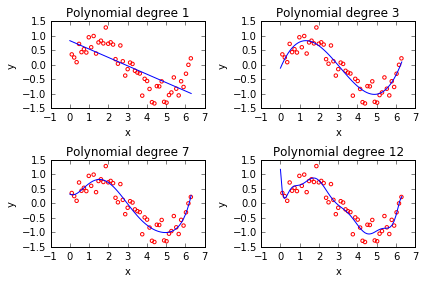

In [220]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # form the data to do polynomial regression.: TODO
        phi = build_poly(x, degree)
        # ***************************************************
        
        # ***************************************************
        # least square and calculate rmse: TODO
        mse, weight = least_squares(y, phi)
        rmse = np.sqrt(2*mse)
        # ***************************************************

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [221]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    shuffle_i = np.arange(len(x))
    np.random.shuffle(shuffle_i)
    # ***************************************************
    # split the data based on the given ratio: TODO
    split1 = shuffle_i[0:round(ratio*len(x))]
    split2 = shuffle_i[(round(ratio*len(x))):len(x)]
    x_split1 = x[split1]
    y_split1 = y[split1]
    
    x_split2 = x[split2]
    y_split2 = y[split2]
    # ***************************************************
    return x_split1,y_split1,x_split2,y_split2

Then, test your `split_data` function below.

In [235]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # split the data, and return train and test data: TODO
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)
    # ***************************************************
    
    # ***************************************************
    # form train and test data with polynomial basis function: TODO
    phi_tr = build_poly(x_tr, degree)
    phi_te = build_poly(x_te, degree)
    # ***************************************************
    
    # ***************************************************
    # calcualte weight through least square.: TODO
    mse_tr, weight_tr = least_squares(y_tr, phi_tr)
    # ***************************************************

    # ***************************************************
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = np.sqrt(2*mse_tr)
    mse_te = compute_loss(y_te, phi_te, weight_tr)
    rmse_te = np.sqrt(2*mse_te)
    # ***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)
    print("\n")

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.243, Testing RMSE=0.255


proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.498


proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.985
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=5.692




# Ridge Regression
Please fill in the function below.

In [236]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # ridge regression: TODO 
    XtX_lamb = np.dot(tx.T, tx) + (lamb*np.eye(np.shape(tx)[1]))
    Xty = np.dot(tx.T,y)
    
    opt_w = np.linalg.solve(XtX_lamb, Xty)
    
    loss = compute_loss(y, tx, opt_w) #+ lamb*(np.linalg.norm(opt_w)**2)
    # ***************************************************
    return loss, opt_w

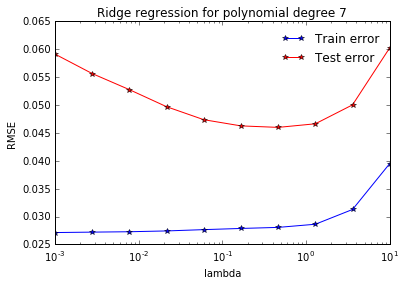

In [239]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)
    train_errors = np.zeros([len(lambdas), 1])
    test_errors = np.zeros([len(lambdas),1])
    # ***************************************************
    # split the data, and return train and test data: TODO
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)
    # ***************************************************

    # ***************************************************
    # form train and test data with polynomial basis function: TODO
    phi_tr = build_poly(x_tr, degree)
    phi_te = build_poly(x_te, degree)
    # ***************************************************

    # ***************************************************
    # ridge regression with different lambda: TODO
    i=0;
    for lamb in lambdas:
        tr_error, tr_w = ridge_regression(y_tr, phi_tr, lamb)
        te_error = compute_loss(y_te, phi_te, tr_w)
        
        train_errors[i] = tr_error
        test_errors[i] = te_error
        i = i+1;
    return train_errors, test_errors
    # ***************************************************

seed = 4
degree = 7
split_ratio = 0.5
train_errors, test_errors = ridge_regression_demo(x, y, degree, split_ratio, seed)
plot_train_test(train_errors, test_errors, lambdas, degree)